<a href="https://colab.research.google.com/github/segobee/Hamoye-Data-Science-/blob/hamo/Stage%20E/Stage_E_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICAL TIME SERIES AND FORECASTING** 

### **THIS NOTEBOOK ANSWERS QUESTIONS FROM 11-20 IN THE STAGE E ASSESSMENT**

#### **Problem Statement**

We want explore building time series forecasting models for measurements of Electricity prices of a District given the total amount of Electricity consumed in that District from 2010 to 2021

#### **Dataset Content**

- Samples ==> 92,016
- Predictors ==> 5

    Independent variables = 4 (FullDate, Tmax, SysLoad, GasPrice)

    Dependent variable = 1 (ElecPrice)

#### **Variable Attribute**

**Dependent Variable**

- `ElecPrice:` Prices of electricity charged in Kw per hour

**Independent VAriables**

- `FullDate:` Date in format yyyy-mm-dd  hh:mm:ss
- `Tmax:` maximum temperature at time-T
- `SysLoad:` Total Load on system or Power consumed at time-T
- `Gas Price:` power generated was done via a gas power plant, gas price is the price of gas at time-T


#### **Further Instructions to answering questions (14-16) 1**

Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16


#### **Further Instructions to answering questions (17-19) 2**

`Multivariate Time Series Forecasting with Facebook Prophet`

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

### **Project Workflow**

#### Step 1: Import the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import seaborn as sns

### Step 2: Import the Dataset 

In [2]:
df_time = pd.read_csv("/content/drive/MyDrive/hamoye_stage_e/Time_series_analysis_and_forecast_DATASET.csv")

In [3]:
df_time

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


#### Step 3: Exploratory Data Analysis

In [4]:
# checking the data info

df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


Since the Month column is not in datetime format, we have to convert the column into datetime data type

In [5]:
## convert month column to datetime data type 

df_time["FullDate"] = pd.to_datetime(df_time["FullDate"])
df_time.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [6]:
# Checking the dataset info again after conversion 

df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [7]:
# checking for missing data in the dataset 

df_time.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

`There is no missing data in the dataset`

So, we can proceed with our analysis.

In [8]:
# checking the statitical information about the dataset 

df_time.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


    Since the FullDate is not the index, let's make it the index

In [9]:
df_index_set = df_time.set_index('FullDate')

In [10]:
# reading the dataset again 

df_index_set.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [11]:
# ckecking the lenght of the dataset

len(df_index_set)

92016

### Step 4: Answering assessment questions

**Question 11**

`Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?`

In [12]:
df_index_set.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


We would be down sampling from hours to day by aggregating all the hours in a day 

In [13]:
# Resampling the FullDate column 

df_time_daily = df_index_set.resample('D').sum()
df_time_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


Text(0, 0.5, 'Electricity Price')

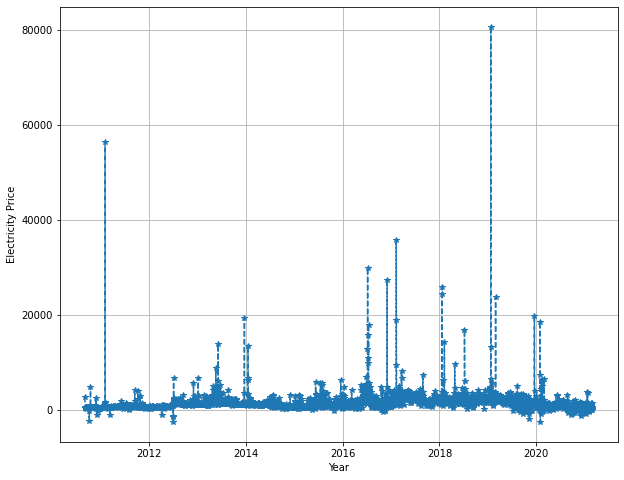

In [14]:
# plotting the ElecPrice against time 

plt.figure(figsize=(10,8))
plt.plot(df_time_daily.index,
         df_time_daily.ElecPrice,
         "--",
         marker = '*')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Electricity Price")

**Question 12**

`Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?`

In [15]:
# importing adfuller 

from statsmodels.tsa.stattools import adfuller 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
# SysLoad Fulller 
sysload_adf = adfuller(df_time_daily['SysLoad'])

# GasPrice Fuller
gasprice_adf = adfuller(df_time_daily['GasPrice'])

# SysLoad and GasPrice p-value

print(f'P-value for SysLoad: {round(sysload_adf[1], 6)}')
print(f'P-value for GasPrice: {round(gasprice_adf[1], 6)}')

P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


    Answer: SysLoad P-value is 0.004254 AND GasPrice P-value is 0.045027

**Question 13**

`Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?`

In [17]:
# Critical values for GasPrice

print('Critical Values for GasPrice:')
for n, c in gasprice_adf[4].items():
  print(f'  {n}: {round(c, 4)}')

# ElecPrice Fuller 

elecprice_adf = adfuller(df_time_daily['ElecPrice'])

# Critical values for ElecPrice

print('Critical Values for ElecPrice:')
for n, c in elecprice_adf[4].items():
  print(f'  {n}: {round(c, 4)}')

Critical Values for GasPrice:
  1%: -3.4321
  5%: -2.8623
  10%: -2.5672
Critical Values for ElecPrice:
  1%: -3.4321
  5%: -2.8623
  10%: -2.5672


    Answer: The critical values of 5% and 10% for both GasPrice and ElecPrice are:

    GasPrice @ 5% ==> -2.8623
    GasPrice @ 10% ==> -2.5672

    ElecPrice @ 5% ==> -2.8623
    ElecPrice @ 10% ==> -2.5672

**Question 14 to 16**

**Instructions**

Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). 

`Answer question 14 - 16`

Extracting Univariate time series from the daily sampling rate 

In [18]:
fb_univar = df_time_daily.drop(["Tmax", "SysLoad", "GasPrice"], axis=1)
fb_univar.head()

,ElecPrice
FullDate,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


In [19]:
# resetting the index

fb_univar.reset_index(inplace=True)
fb_univar.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [20]:
# renaming the columns 

df_prophet_uni = fb_univar.rename(columns={"FullDate": "ds", "ElecPrice":"y"})
df_prophet_uni.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


Dividing the data into train and test data

In [21]:
df_prophet_uni_train = df_prophet_uni.iloc[:2757]
df_prophet_uni_test = df_prophet_uni.iloc[2757:]

# checking the shape of the splitted data 

df_prophet_uni_train.shape, df_prophet_uni_test.shape

((2757, 2), (1077, 2))

In [22]:
# visualize the splitted dataset

df_prophet_uni_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [23]:
df_prophet_uni_test.head()

,ds,y
2757,2018-03-20,1833.00
2758,2018-03-21,1730.49
2759,2018-03-22,2260.55
2760,2018-03-23,2138.76
2761,2018-03-24,1721.70


In [24]:
# resetting the index of the test data 

df_prophet_uni_test.reset_index(inplace=True)
df_prophet_uni_test.head()

,index,ds,y
0,2757,2018-03-20,1833.00
1,2758,2018-03-21,1730.49
2,2759,2018-03-22,2260.55
3,2760,2018-03-23,2138.76
4,2761,2018-03-24,1721.70


In [25]:
df_prophet_uni_test.drop('index', axis=1, inplace=True)
df_prophet_uni_test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y
0,2018-03-20,1833.000
1,2018-03-21,1730.490
2,2018-03-22,2260.550
3,2018-03-23,2138.760
4,2018-03-24,1721.700
...,...,...
1072,2021-02-24,634.770
1073,2021-02-25,577.515
1074,2021-02-26,1445.495
1075,2021-02-27,488.980


In [26]:
# instantiating the prophet model

fb_model = Prophet()


# fitting the model with train dataser

fb_model.fit(df_prophet_uni_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# make some predictions with the model

forecast = fb_model.predict(df_prophet_uni_test)

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,168.321533,4802.465227,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,241.799325,5170.272958,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,249.646264,5150.773698,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,377.213991,5014.970156,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-63.901585,4560.536320,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


Using the above to answer questions from 14 - 15

**Question 14**

`Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?`

In [28]:
# let's define a function to input the true test and forecast values into it

def model_performance_mape(y_true, y_forecast):
  y_true = np.array(y_true)
  y_forecast = np.array(y_forecast)
  mape = np.mean(np.abs((y_true - y_forecast) / y_true)) * 100
  return mape

In [29]:
MAPE_value = round(model_performance_mape(df_prophet_uni_test['y'], forecast['yhat']), 2)
MAPE_value 

549.48

    Answer: MAPE = 549.48

**Question 15**

`What is the RMSE in 2 decimal places?`

In [30]:
from sklearn.metrics import mean_squared_error

RMSE = float(format(np.sqrt(mean_squared_error(df_prophet_uni_test['y'], forecast['yhat'])), '.2f'))
RMSE

3218.16

    Answer: RMSE = 3218.16

**Question 16**

`If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?`

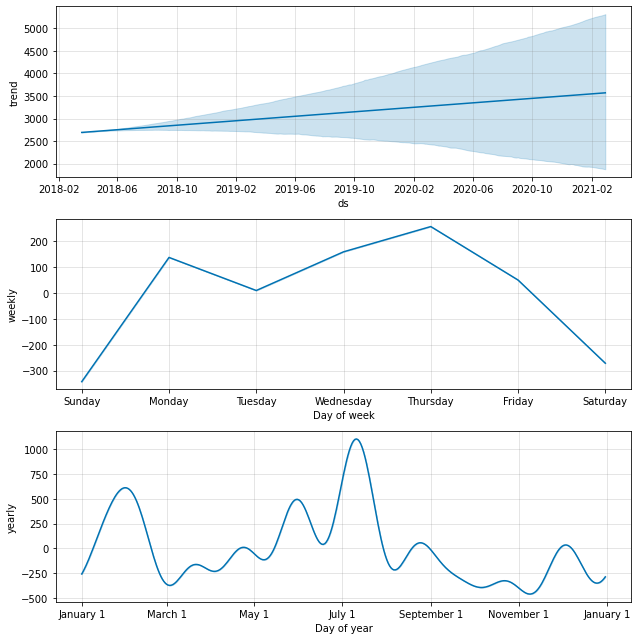

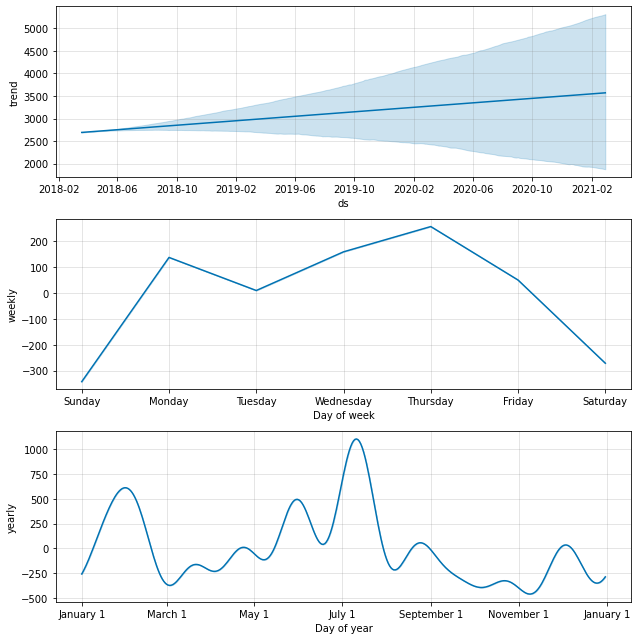

In [31]:
fb_model.plot_components(forecast)

    Answer: From the visual above, the month of the yearly seasonality with the highest values is = JULY 

**Intructions for Questions 17-19**

`Multivariate Time Series Forecasting with Facebook Prophet`

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. 

**Answer question 17-19:**



In [32]:
# making a copy of daily rate df

multi_df = df_time_daily
multi_df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [33]:
# resetting the index

multi_df.reset_index(inplace=True)

In [34]:
# renaming the columns to ds, add1, add2, add3, y

multi_dataset = df_time_daily.rename(columns={'FullDate':'ds', 
                                        'Tmax':'add1',
                                        'SysLoad': 'add2',
                                        'GasPrice': 'add3',
                                        'ElecPrice': 'y'})
multi_dataset.head()

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [35]:
# splitting the multivariate dataset to train and test 

multi_df_train = multi_dataset.iloc[:2757]
multi_df_test = multi_dataset.iloc[2757:]

# checking the shape of the splitted data 

multi_df_train.shape, multi_df_test.shape

((2757, 5), (1077, 5))

In [36]:
# instantiating the prophet model again for multivariate 

fb_model_multi = Prophet()

# adding the regressors to the model 

fb_model_multi.add_regressor('add1')
fb_model_multi.add_regressor('add2')
fb_model_multi.add_regressor('add3')

# fitting the model with the multivariate train dataset

fb_model_multi.fit(multi_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
# forecasting with the model 

forecast_multi = fb_model_multi.predict(multi_df_test)
forecast_multi.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1865.896478,-228.152172,4069.715949,1865.896478,1865.896478,0.235947,0.235947,0.235947,-856.397810,...,-84.514318,-84.514318,-84.514318,-38.922541,-38.922541,-38.922541,0.0,0.0,0.0,1985.928781
1,2018-03-21,1866.582912,-238.897662,4033.548986,1866.582912,1866.582912,0.233148,0.233148,0.233148,-1026.414783,...,42.487809,42.487809,42.487809,-29.648609,-29.648609,-29.648609,0.0,0.0,0.0,1977.305515
2,2018-03-22,1867.269345,666.342706,5180.457186,1867.269345,1867.269345,0.219583,0.219583,0.219583,-214.963890,...,145.592749,145.592749,145.592749,-24.630734,-24.630734,-24.630734,0.0,0.0,0.0,2897.552092
3,2018-03-23,1867.955778,310.933508,4702.882184,1867.955778,1867.955778,0.211616,0.211616,0.211616,-274.903564,...,-44.332666,-44.332666,-44.332666,-23.727345,-23.727345,-23.727345,0.0,0.0,0.0,2581.732539
4,2018-03-24,1868.642211,-683.505727,3634.041376,1868.642211,1868.642211,0.209679,0.209679,0.209679,-1076.461166,...,-117.498131,-117.498131,-117.498131,-26.687486,-26.687486,-26.687486,0.0,0.0,0.0,1434.764330


**Question 17**

`Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?`

In [38]:
# using the MAPE function defined earlier 

MAPE_value_multi = round(model_performance_mape(multi_df_test['y'], forecast_multi['yhat']), 2)
MAPE_value_multi

231.38

    Answer: MAPE = 231.38%

**Question 18**

`What is the RMSE in 2 decimal places?`

In [39]:
RMSE_multi = float(format(np.sqrt(mean_squared_error(multi_df_test['y'], forecast_multi['yhat'])), '.2f'))
RMSE_multi

2707.04

    Answer: RMSE for multivariate = 2707.04

**Question 19**

`If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?`

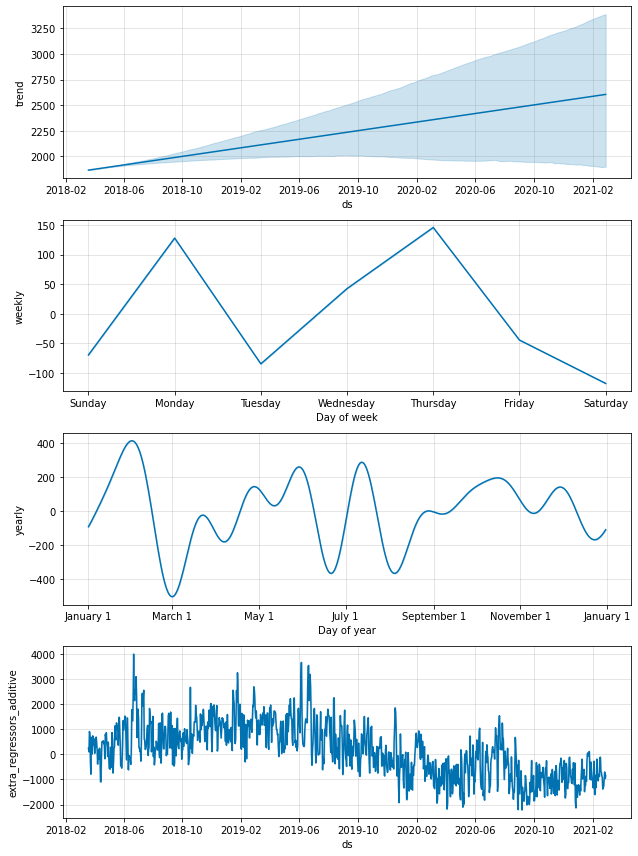

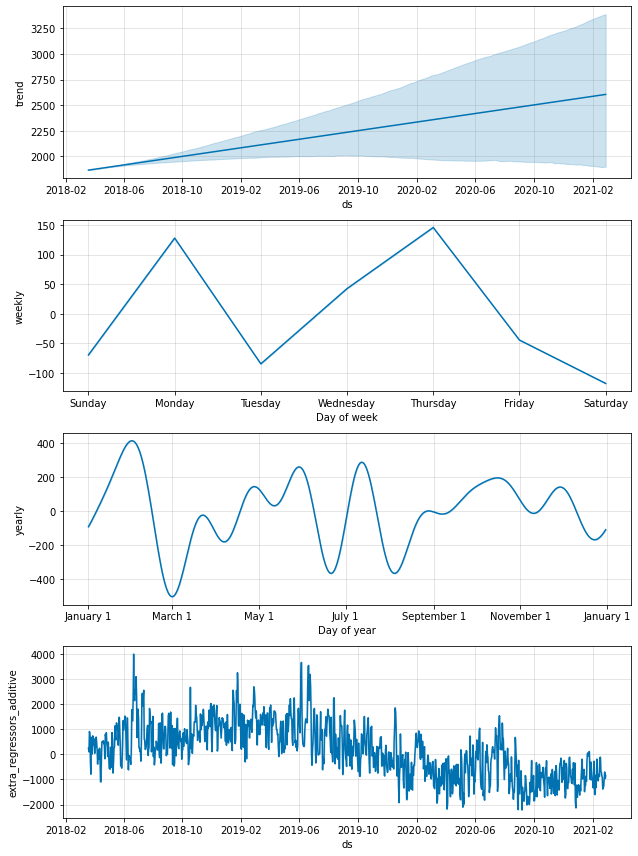

In [40]:
fb_model_multi.plot_components(forecast_multi)

    Answer: From the visual above, the day of the daily seasonality with the highest values is = THURSDAY

**Question 20**

`Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),`

**What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?**

In [41]:
# dropping T-max from multi train dataset 
# since T-max rep as add1 
# we'll drop add1 in the train set 

multi_df_train.drop(columns = ['add1'],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
multi_df_train.head()

,ds,add2,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [43]:
# renaming the train columns

multi_df_train = multi_df_train.rename(columns={'add2': 'add1', 
                                                'add3': 'add2'})
multi_df_train

,ds,add1,add2,y
0,2010-09-01,41565.38000,88.5600,2751.700
1,2010-09-02,38898.99000,88.5600,570.810
2,2010-09-03,41665.76000,106.8000,504.975
3,2010-09-04,35638.08500,81.3600,502.275
4,2010-09-05,35611.41000,106.8000,500.555
...,...,...,...,...
2752,2018-03-15,27139.02585,220.6272,2717.340
2753,2018-03-16,19710.46400,216.9600,2277.335
2754,2018-03-17,1079.34705,209.0400,1718.385
2755,2018-03-18,-4102.43795,203.9880,1088.015


In [44]:
# dropping T-max from multi train dataset 
# since T-max rep as add1 
# we'll drop add1 in the train set 

multi_df_test.drop(columns=['add1'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
# renaming the test columns

multi_df_test = multi_df_test.rename(columns={'add2': 'add1', 
                                                'add3': 'add2'})
multi_df_test

,ds,add1,add2,y
2757,2018-03-20,7696.91130,201.5880,1833.000
2758,2018-03-21,4658.05865,203.2560,1730.490
2759,2018-03-22,19161.78525,203.2560,2260.550
2760,2018-03-23,18090.43435,198.6456,2138.760
2761,2018-03-24,3763.53865,180.2160,1721.700
...,...,...,...,...
3829,2021-02-24,-1525.49745,134.4000,634.770
3830,2021-02-25,4539.07855,130.5048,577.515
3831,2021-02-26,9517.02430,130.1808,1445.495
3832,2021-02-27,4932.88015,130.0800,488.980


In [46]:
# checking the shape of the dataset after removing add1

multi_df_train.shape, multi_df_test.shape

((2757, 4), (1077, 4))

In [47]:
# instantiating the prophet model after removing T-max

fb_model_multi2 = Prophet()

# adding the regressors to the model 

fb_model_multi2.add_regressor('add1')
fb_model_multi2.add_regressor('add2')

# fitting the model with the multivariate train dataset

fb_model_multi2.fit(multi_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
# forecasting with the model 

forecast_multi = fb_model_multi2.predict(multi_df_test)
forecast_multi.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1873.736349,-255.380285,4038.551426,1873.736349,1873.736349,-856.217792,-856.217792,-856.217792,1101.173980,...,-84.272057,-84.272057,-84.272057,-38.232850,-38.232850,-38.232850,0.0,0.0,0.0,1996.187630
1,2018-03-21,1874.447367,-212.989887,4239.560523,1874.447367,1874.447367,-1026.199027,-1026.199027,-1026.199027,1125.642280,...,42.671221,42.671221,42.671221,-28.872483,-28.872483,-28.872483,0.0,0.0,0.0,1987.689358
2,2018-03-22,1875.158384,848.430013,5037.257712,1875.158384,1875.158384,-214.918703,-214.918703,-214.918703,1125.642280,...,145.282901,145.282901,145.282901,-23.766355,-23.766355,-23.766355,0.0,0.0,0.0,2907.398506
3,2018-03-23,1875.869402,197.204231,4829.819476,1875.869402,1875.869402,-274.845778,-274.845778,-274.845778,1058.011195,...,-44.097347,-44.097347,-44.097347,-22.773979,-22.773979,-22.773979,0.0,0.0,0.0,2592.163493
4,2018-03-24,1876.580419,-814.481385,3649.314987,1876.580419,1876.580419,-1076.234889,-1076.234889,-1076.234889,787.662889,...,-117.803753,-117.803753,-117.803753,-25.645550,-25.645550,-25.645550,0.0,0.0,0.0,1444.559116


In [49]:
# using the MAPE function defined earlier 

MAPE_value_multi2 = round(model_performance_mape(multi_df_test['y'], forecast_multi['yhat']), 2)
MAPE_value_multi2

236.66

    Answer: MAPE = 236.66%